## 연도별출생인구비교분석

- 국가통계포털 https://kosis.kr
- 월.분기.연간 인구동향(출생,사망,혼인,이혼) 검색
- 행정구역별 전국제외/ 종류 출생아수 / 년도 선택 1997 ~ 2024년 (울산광역시와 세종시연관해서)
- 행렬전환 선택
- 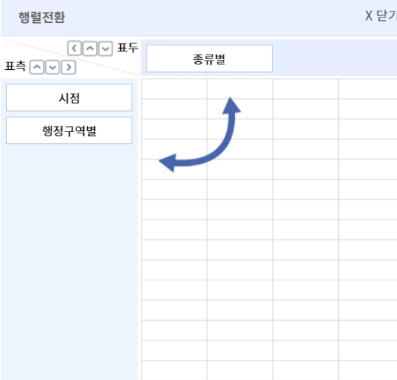

In [2]:
!hostname -I

172.19.0.2 


In [19]:
# !pip install matplotlib
# !pip install pandas
# !pip install hdfs

Text(0.2, 0.4, '한글')

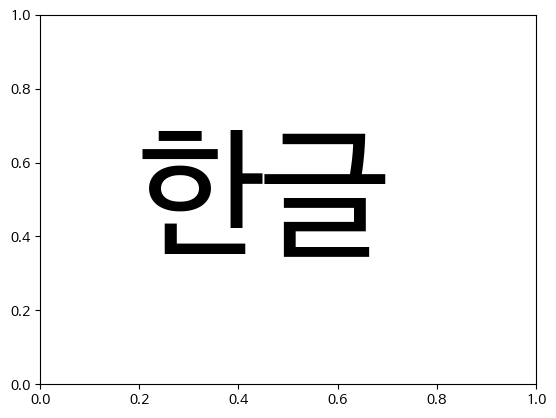

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime
from hdfs import InsecureClient
plt.rc('font', family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=100)

In [3]:
from hdfs import InsecureClient
import pandas as pd
user = "hadoop"
host = "http://namenode:9870"
path = "/user/hadoop/" 
filename = "월분기연간인구동향출생2.csv"
fullpath = path + filename
hdfs = InsecureClient(host, user)
with hdfs.read(fullpath, encoding='EUC-KR') as reader:
    data = pd.read_csv(reader)
data

,시점,행정구역별(1),출생아수(명)
0,1997,서울특별시,142724
1,1997,부산광역시,46284
2,1997,대구광역시,35219
3,1997,인천광역시,38103
4,1997,광주광역시,21684
...,...,...,...
471,2024 p),전북특별자치도,6800
472,2024 p),전라남도,8200
473,2024 p),경상북도,10300
474,2024 p),경상남도,13100


In [4]:
ex1_data = data.copy()
ex1_data.columns = ["year","region","value"]
ex1_data['value'] = ex1_data['value'].astype(str).replace('-','0').astype(int)
ex1_data['year'] = ex1_data['year'].astype(str).replace(' p)','').astype(str)
# 1997년 이후만 선택
# ex1_data = ex1_data[ex1_data['year']>=1997]
ex1_data.head(3)

,year,region,value
0,1997,서울특별시,142724
1,1997,부산광역시,46284
2,1997,대구광역시,35219


In [5]:
# 연도별 출생 인구비율 비교차트 그리기 , 지역과 출생연도를 기준으로 인구수를 정리
ex1_data = ex1_data.groupby(['region','year'], as_index=False)['value'].sum()
ex1_data.head(3)

,region,year,value
0,강원특별자치도,1997,19821
1,강원특별자치도,1998,19421
2,강원특별자치도,1999,19143


In [6]:
# 'value' 열을 지역별로 백분율로 전환
# 각 지역별로 'value' 열의 값을 합산 후, 각 값에 대해 전체 합계 대비 백분율을 계산
ex1_data['value'] = ex1_data.groupby(['region'])['value'].apply(lambda x: 100 * x/ float(x.sum())).reset_index(drop=True)
# 결측값 제거
ex1_data = ex1_data.dropna() # 결측값을 제거

print(ex1_data.head(15))

     region  year     value
0   강원특별자치도  1997  5.782831
1   강원특별자치도  1998  5.666130
2   강원특별자치도  1999  5.585023
3   강원특별자치도  2000  5.683927
4   강원특별자치도  2001  4.922744
5   강원특별자치도  2002  4.467901
6   강원특별자치도  2003  4.186360
7   강원특별자치도  2004  4.019186
8   강원특별자치도  2005  3.692714
9   강원특별자치도  2006  3.633780
10  강원특별자치도  2007  3.994095
11  강원특별자치도  2008  3.609857
12  강원특별자치도  2009  3.533709
13  강원특별자치도  2010  3.640199
14  강원특별자치도  2011  3.620068


['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024 p)']


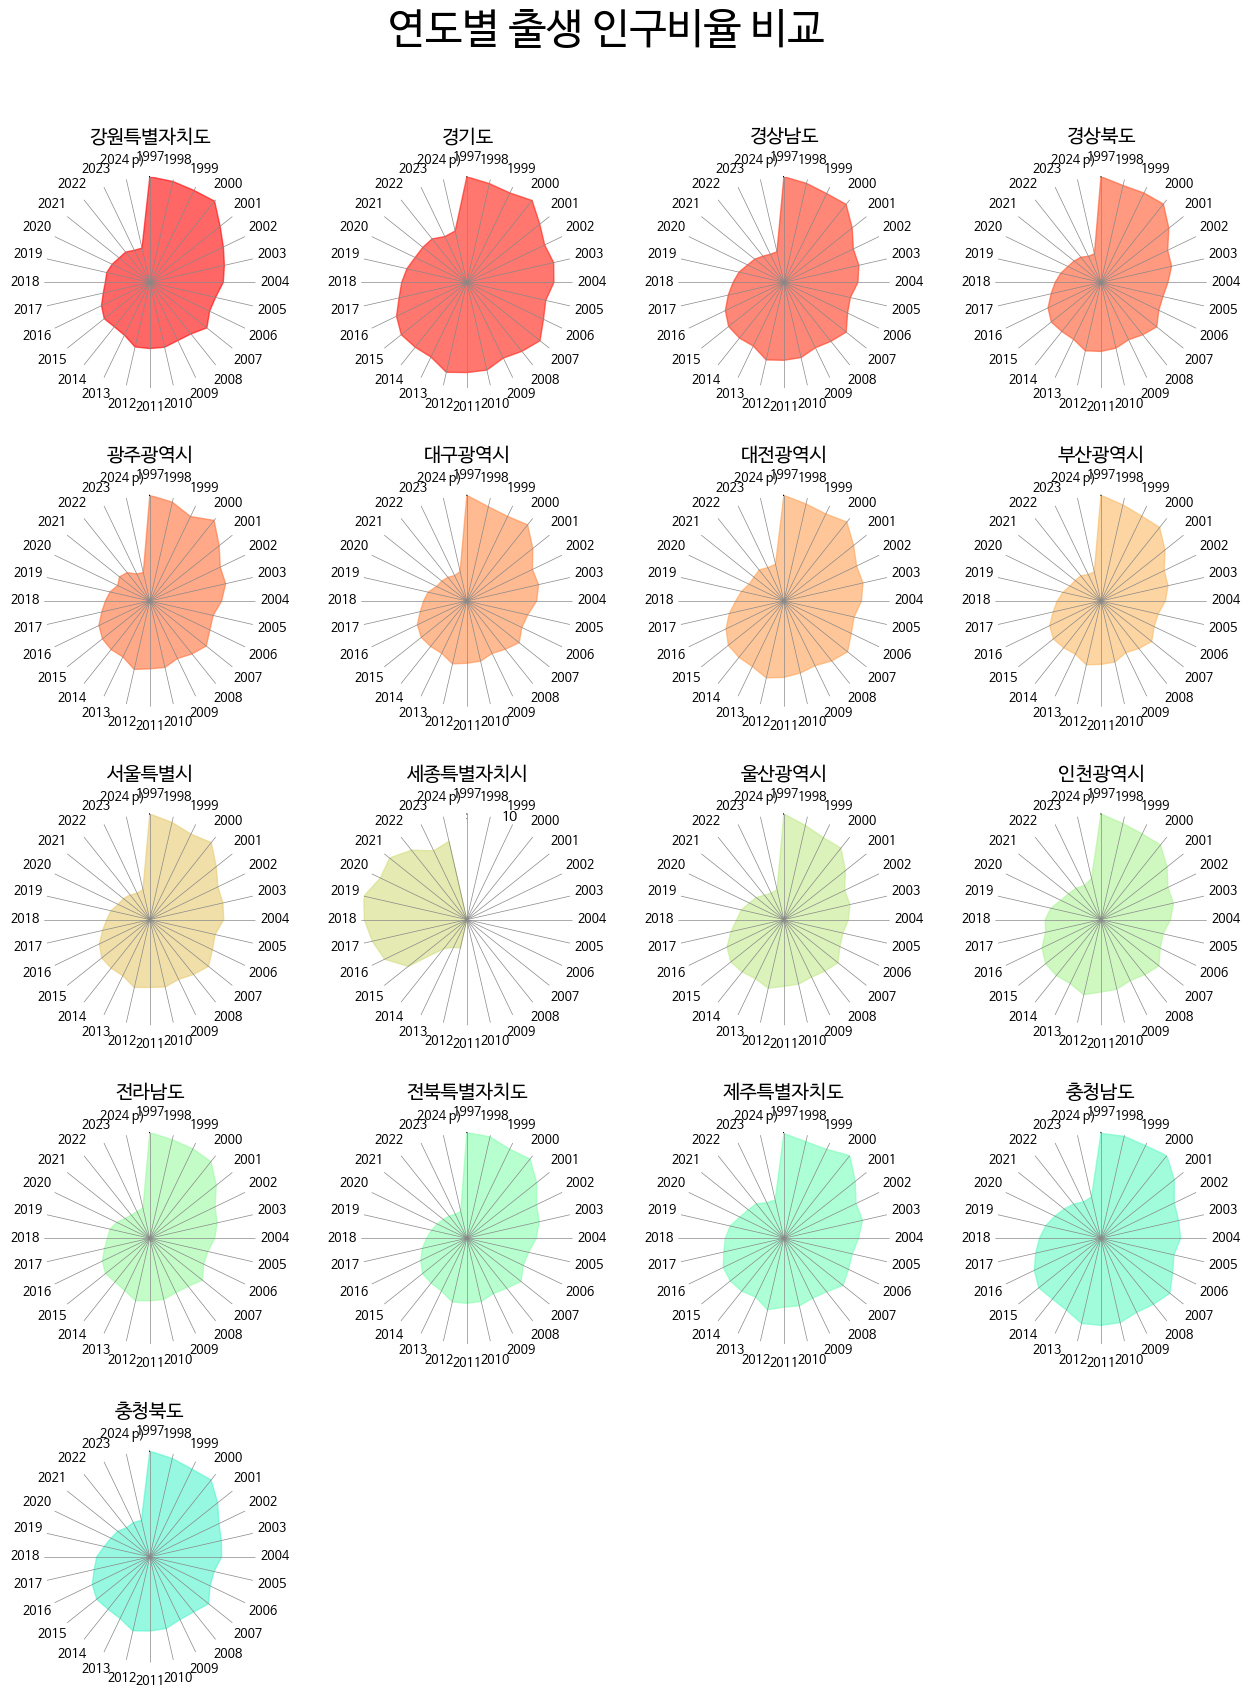

In [11]:
pi = 3.141592
fig, axe = plt.subplots(5, 4 , figsize=(15,20), subplot_kw = dict(polar=True))

#서브플롯을 1차원 배열 형태로 변환
axs = axe.flat

# 고유한 년도 리스트 생성
year_list = list(ex1_data['year'].unique())
# print(year_list)

# 지역별로 색상 설정
colors = [plt.cm.rainbow(a) for a in np.linspace(1.0 ,0.0 , len(year_list))]

# 서브플록 인덱스 초기화
i = 0

for region, value in ex1_data.groupby('region'):
    # print(region, value)
    # 각 지역의 값 리스트 생성
    val = list(value['value'])
    ex1_plot_data = val.copy()
    ex1_plot_data += ex1_plot_data[:1] # 마지막값을 처음값으로 넣기
    # 각 값에 대한 각도 계산
    angles = [n / float(len(val)) * 2 * pi for n in range(len(val))]
    angles += angles[:1] # 마지막값을 처음값으로 넣기 즉, 값 닫기

    # 서브플롯 설정
    axs[i].set_theta_offset(pi/2)  # 0도를 위쪽으로 설정
    axs[i].set_theta_direction(-1)  # 시계 반대 방향으로 각도 증가
    axs[i].set_rlabel_position(20)  # 반지름 레이블 위치 설정
    axs[i].xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)  # x축 그리드 설정
    axs[i].yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)  # y축 그리드 설정
    axs[i].set_rgrids([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=10)  # 반지름 그리드 설정
    axs[i].set_xticks(angles[:-1])  # x축 틱 설정
    axs[i].xaxis.set_ticklabels(list(year_list), fontsize=9)  # x축 틱 레이블 설정
    axs[i].set_ylim(0, max(val))  # y축 범위 설정

    # 선 그리기
    axs[i].plot(angles, ex1_plot_data, linewidth=0, linestyle='solid', zorder=3)

    # 배경 채우기
    axs[i].fill(angles, ex1_plot_data, color=colors[i], alpha=0.6)

    # 서브플롯 제목 설정
    axs[i].set_title(region, fontsize=14, position=(0.5, 1.1))    
    i += 1

# 데이터 없는 서브플롯 숨기기
for j in range(i, len(axs)):
    fig.delaxes(axs[j])

# 전체 플롯 제목을 설정
fig.suptitle("연도별 출생 인구비율 비교",fontsize=30, y=0.95)
# 서브플롯 간의 간격 조정
fig.subplots_adjust(wspace=0.5)
# 플롯을 그림파일로 저장
plt.savefig('연도별출생인구비율.png')
plt.show()

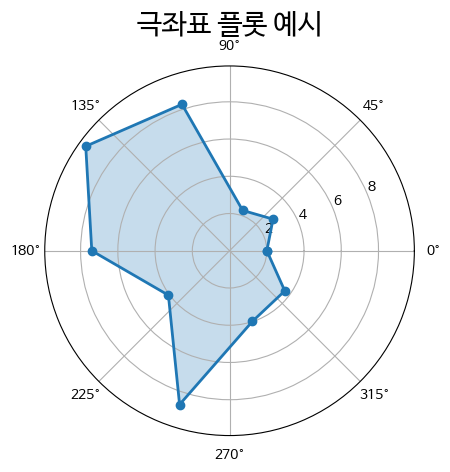

In [8]:
# 극좌표 플롯
# 데이터 생성
angles = np.linspace(0,2*np.pi ,10, endpoint=False)
radii = np.random.rand(10)*10

# 첫 번째 값을 마지막에 추가하여 원형 플롯완성
angles = np.concatenate((angles,[angles[0]]))
radii =  np.concatenate((radii,[radii[0]]))

# 극좌표 플롯 생성
fig, ax = plt.subplots(subplot_kw = dict(polar=True))
ax.plot(angles, radii, 'o-', linewidth=2)

# 배경채우기
ax.fill(angles, radii, alpha= 0.25)
# 플롯 제목 설정
ax.set_title("극좌표 플롯 예시", size=20)

plt.show()